# The Earth
First, you will set up the simplest possible `REBOUND` simulation, with just the Sun and the Earth. This example will go through all of the necessary steps to run and visualise a simulation. You can copy and modify these as necessary for later parts of this lab.

Since you are running this in a 'JUPYTER' notebook, you can execute cells with the "run" button above, but hitting `shift+enter` will also work. You can edit cells by clicking in them.

## Importing packages
First, we need to make sure that we have access to the necessary python packages. These are just files with functions and other objects in them, which we need to do the simulations, make plots, deal with vectors, etc. Here we need the packages `REBOUND`, `matplotlib`, and `numpy`.

In a jupyter notebook we can additionally run the "magic" command `%matplotlib notebook`, which makes the plots interactive and lets us view animations. If the plots aren't coming up as interactive, try executing this box again.

In [1]:
import rebound                  # the simulator
import numpy as np              # handy module for vectors
import matplotlib.pyplot as plt # for plotting
#%matplotlib notebook

In python, the hash symbol `#` is a comment, and on a given line everything after the `#` will not be executed as code.  We use it above for making comments on each line.  You can use this to easily stop a line being executed by putting the `#` at the very start of a line.  This will be handy later if you want to temporarily ignore a line of code.  In the box below the `#` means that $x$ will not be set to 2.

In [2]:
# x = 1 + 2

## Basic simulation setup
To get your Earth simulation set up, first you need to create a simulation "object" and specify the units to use. To make things easy you can use years, astronomical units ($1.5 \times 10^{11}$m), and kilograms. With these units, the Earth's distance from the Sun is 1 by definition.

You should also set the current time to zero, this is actually the default in 'REBOUND', but you can do it just to be sure.

In [3]:
sim = rebound.Simulation()     # this names your simulation "sim" 
sim.units = ('yr', 'AU', 'kg') # the units for your simulation
sim.t = 0.0                    # sets the current time to zero

Now you add the Sun and the Earth to the simulation object `sim`. `rebound` has several ways to add "particles" such as the Sun and the Earth.  Here you can use Cartesian coordinates. First add the Sun at the origin, with no velocity.

In [4]:
msun = 1.989e30                 # defining "msun" to the mass of the sun in kg.
sim.add(m=msun, x=0, y=0, z=0, vx=0, vy=0 ,vz=0)  # adding the sun to the sim at (0,0,0) with velocity of (0,0,0).

Now you can add the Earth. For this demonstration we will pretend that the Earth's orbit is circular (in fact the Earth's eccentricity is presently $e=0.017$).  The radius of the orbit will be 1 AU.  You also need to work out the Earth's velocity.  We know it takes one year for the Earth to go around the Sun. The length of this path is $2 \pi$ AU, so the velocity is $2\pi$ per year, which with our units is just $2\pi$. If we put the Earth at $x=1$, then the velocity needs to be in the $y$ direction for a circular orbit.  So now we will enter this information into the simulation.

In [5]:
v_earth = 2*np.pi # Defining the Earth velocity. Note we can get pi by using np.pi
mearth = 6e24     # Defining the mass of the Earth in kg 
sim.add(m=mearth,x=1, y=0, z=0,vx=0, vy=v_earth, vz=0) # adding the Earth to the sim

One thing that is worth doing is to make sure that the system you are simulating is not going to move as a whole. We do this by moving the system center of mass to the origin, and subtracting any net system momentum from all particles. `REBOUND` has a simple command for this:

In [6]:
sim.move_to_com()

`rebound` has a nice way of plotting orbits, which shows a trace for the orbital path. The next line will show the current status of the simulation, which is $t$=0. To get the plot to display nicely you can specify the plot limits and the units for the axes.

This function returns `figure` and `axis` objects, which you can use to plot additional things if you wished. `fig.tight_layout()` isn't really necessary, but cuts some white space from around the plot.

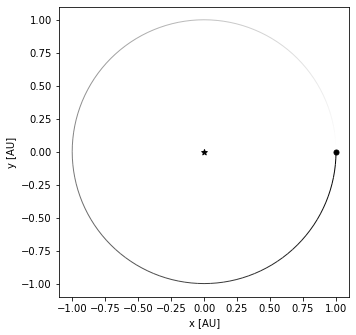

In [7]:
fig, ax = rebound.OrbitPlot(sim, orbit_type='trail',
                            xlim=(-1.1,1.1), ylim=(-1.1,1.1), unitlabel='[AU]') # Plotting the sim 
fig.tight_layout() # Cutting out some whitespace on the plot

The simulation is now set up, so you can run it forwards (or backwards) in time. You do that by telling `rebound` the time we want it to integrate to. Since you chose units of years, to step forward half a year in the future we set $tmax=0.5$.

In [8]:
sim.integrate(tmax=0.5)

We can check that the simulation really is at $t=0.5$ by getting it to print the time.

In [9]:
sim.t

0.5

And we can see what the system now looks like by running exactly the same plot command as above

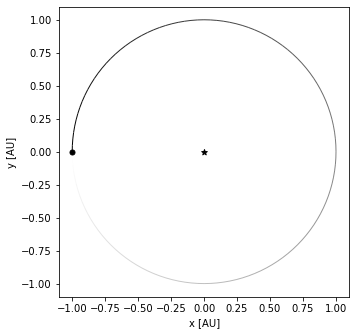

In [10]:
fig, ax = rebound.OrbitPlot(sim, orbit_type='trail',
                            xlim=(-1.1,1.1), ylim=(-1.1,1.1), unitlabel='[AU]')
fig.tight_layout()

You have now achived with `rebound` what would have taken the Solar System six months - and what would have taken quite a lot of time to compute by hand! Nice work.

### Earth After One Day 
In Q2 of the preparatory questions you manually worked out the position and velocity of the Earth after a time-step of one day.  You can now make this same calculation with `rebound`.  Recall your time units are years, so one day is $t=1/365$.  

In [11]:
sim.integrate(tmax=1/365)  # Integrating to one day

Now you can output the position (x,y) and velocity (vx,vy) of the Earth after one day.  Note that in this simulation Earth is "particle 1", since the Sun is "particle 0" (`Python` counting starts from zero).  Compare these values to the values you calculated for the Earth in Q2 of the prepatory questions.  Careful with units in this comparison.

In [12]:
sim.particles[1].x, sim.particles[1].y, sim.particles[1].vx, sim.particles[1].vy # outputing x,y position and velocity


(0.999848789136488,
 0.017213304035581106,
 -0.10817915515285381,
 6.282235221272086)

## Plotting quantities over time
You can check the progress of a simulation by plotting the location of the planet at a series of times throughout an orbit.

To do this you can make an array of times using the `numpy` package, and then output the position of the planet at each of these times.  `numpy` has a function called `linspace` which is useful for making an evenly spaced array of time.  In the example below we create an array of times from 0 to 1 year with 50 evenly spaced steps.

In [13]:
times = np.linspace(0, 1, 50) # creating a 50 element array between 0 and 1
print(times) # print the array to verify it looks correct

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


Now for each of these times we can calculate the $(x,y)$ position of the Earth.

In [14]:
x = []  # Creating an empty array to hold x positions
y = []  # Creating an empty array to hold y positions

# Loop to calculate the x and y positions for each time in the time array
for t in times:
    sim.integrate(tmax=t)
    x.append(sim.particles[1].x)
    y.append(sim.particles[1].y)  

Now you can plot the $x,y$ positions as a function of time. You should think about what you expect for these plots before you create the plot.  Below is an example of plotting the $x$ position of the planet against time.  You can also modify this to plot the y position against time.

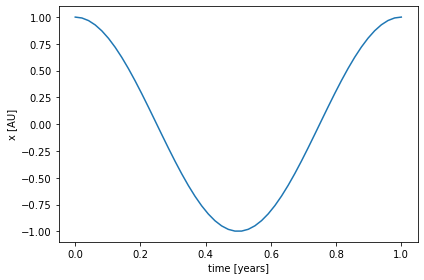

In [15]:
fig, ax = plt.subplots()
ax.plot(times, x)
ax.set_xlabel('time [years]')
ax.set_ylabel('x [AU]')
fig.tight_layout()

## Animation
Since you have data as a function of time, you can try to animate the motion. This type of animation can be a helpful way to analyse your data.  As long as you are using the `%matplotlib notebook`, the movie should appear in the notebook.  However you could also save the movie as an mp4 using the commented-out line below.

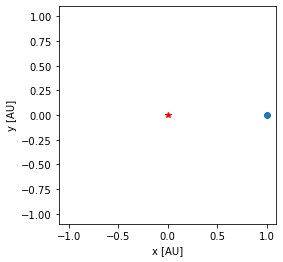

In [16]:
import matplotlib.animation as animation
fig, ax = plt.subplots()
dot = ax.plot(x[0], y[0], 'o')[0]
star = ax.plot(0, 0, '*', color='red')
ax.set_aspect('equal')
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1.1,1.1)
ax.set_xlabel('x [AU]')
ax.set_ylabel('y [AU]')

def animate(i):
    dot.set_xdata(x[i])  # update the data.
    dot.set_ydata(y[i])
    return dot

ani = animation.FuncAnimation(fig, animate, frames=len(x))
# ani.save('earth_orbit.mp4')

## Re-running the simulation
You should try experimenting with this simple simulation.  For example, go back and change the Earth's mass to a value much higher or lower than the real value.  Each time you make a change like this, make sure you re-execute all of the steps starting with `sim = rebound.Simulation()`, since otherwise you'll add multiple Earths to the simulation.  You can try changing other parts of the simulation - e.g. the Sun's mass, the initial velocity of the Earth, the units of the simulation.  For each of these changes note down what you changed and how it affected the simulation.

## Help!
There are many things that might go wrong while running these simulations - but you cannot really break anything so feel free to try things out. If you get stuck, the simplest thing to do is restart the notebook, which will clear all variables.  Plotting the simulation will normally help you diagnose any problems and provide a useful sanity check.